In [1]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = hand;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

,cname,ampm,timeofday,dateofmeasure,pef1,pef2,pef3,pefmax,indexpef,so2,co,o3,no2,pm10,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,winddirection,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime
0,hand,am,07:40:00,2014-12-24,319.000,305.000,319.000,319.000,G,0.196,19.900,0.077,1.176,1072.000,1.900,nan,0.300,83.000,5.800,-0.600,1017.300,1021.600,-0.400,0.000,3.700,1023.900,96.000,-6.600,1000.000,56.000,1.900,1023.900,65.000,10.300,23.900,40.000,0.012,21.000,0.006,7.000,1.400,10.000,0.600,18.000,0.009,6.000,0.002,7.000,0.067,10.000,0.031,6.000,55.000,21.000,28.000,7.000
1,hand,am,06:41:00,2014-12-25,326.000,300.000,307.000,326.000,G,0.180,18.400,0.378,0.750,1177.000,-3.600,nan,1.200,66.000,3.100,-9.000,1023.900,1028.300,-3.900,290.000,7.900,1023.800,86.000,-3.700,1000.000,55.000,5.600,1017.100,58.000,11.600,23.800,31.000,0.017,15.000,0.004,22.000,1.800,9.000,0.200,18.000,0.025,4.000,0.002,8.000,0.064,9.000,0.012,4.000,121.000,15.000,11.000,19.000
2,hand,am,07:25:00,2014-12-26,311.000,300.000,273.000,311.000,G,0.115,12.900,0.484,0.436,709.000,-5.600,nan,1.100,54.000,2.200,-13.400,1027.100,1031.600,-5.300,320.000,3.100,1026.900,64.000,-5.000,1000.000,33.000,-3.900,1024.200,50.000,8.100,26.900,31.000,0.006,10.000,0.004,8.000,0.700,16.000,0.300,18.000,0.030,15.000,0.011,9.000,0.025,9.000,0.012,13.000,43.000,21.000,19.000,19.000
3,hand,am,06:50:00,2014-12-27,286.000,311.000,324.000,324.000,G,0.136,17.000,0.173,0.914,867.000,-6.600,nan,0.100,84.000,3.100,-8.800,1027.700,1032.200,-5.000,0.000,2.300,1027.700,85.000,-6.800,1000.000,27.000,-5.800,1027.500,51.000,9.100,27.700,58.000,0.007,11.000,0.005,6.000,1.300,24.000,0.400,14.000,0.017,15.000,0.002,20.000,0.059,1.000,0.021,6.000,50.000,1.000,24.000,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,hand,pm,18:45:00,2016-10-03,185.000,181.000,169.000,185.000,Y,0.066,9.300,0.482,0.332,397.000,23.400,1.485,2.200,78.000,22.400,19.300,1006.700,1010.600,22.200,270.000,27.700,1007.100,100.000,17.400,1000.000,54.000,27.300,1005.300,100.000,10.300,7.100,46.000,0.004,4.000,0.002,18.000,0.500,19.000,0.300,3.000,0.042,16.000,0.008,20.000,0.027,19.000,0.005,5.000,28.000,24.000,6.000,8.000
1305,hand,pm,18:17:00,2016-10-04,204.000,196.000,230.000,230.000,Y,0.065,10.500,0.460,0.572,709.000,25.900,1.485,3.200,52.000,17.300,15.200,1009.400,1013.300,21.700,110.000,28.200,1012.700,100.000,14.200,1000.000,43.000,27.000,1011.900,100.000,14.000,12.700,57.000,0.003,20.000,0.002,18.000,0.600,7.000,0.300,18.000,0.039,17.000,0.002,7.000,0.036,24.000,0.016,18.000,44.000,11.000,4.000,21.000
1306,hand,pm,19:21:00,2016-10-05,214.000,209.000,201.000,214.000,Y,0.063,10.300,0.460,0.490,584.000,20.900,1.485,1.400,86.000,21.200,18.400,1008.200,1012.200,19.900,270.000,26.500,1010.300,95.000,17.200,1000.000,53.000,21.700,1004.000,67.000,9.300,10.300,42.000,0.003,19.000,0.002,2.000,0.600,21.000,0.400,20.000,0.044,15.000,0.002,21.000,0.038,20.000,0.008,3.000,42.000,15.000,10.000,2.000
1307,hand,pm,18:11:00,2016-10-06,230.000,196.000,211.000,230.000,Y,0.072,10.900,0.652,0.388,920.000,18.800,1.485,2.100,60.000,12.900,10.800,1017.800,1021.800,18.000,290.000,23.300,1017.800,93.000,13.800,1000.000,44.000,19.500,1017.800,84.000,9.500,17.800,49.000,0.003,18.000,0.003,18.000,0.600,16.000,0.400,18.000,0.045,16.000,0.007,8.000,0.038,20.000,0.008,4.000,48.000,15.000,27.000,9.000


In [41]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 
df.insert(4, 'npt',0)
df.insert(4, 'pef',0)
df.npt = pd.notnull(df.pef1)*1 + pd.notnull(df.pef2)*1 + pd.notnull(df.pef3)*1
df = df[df.npt > 0]
df=df.reset_index(drop=True)
df.pef = (df.pef1 + df.pef2 + df.pef3)/df.npt

#2. Combine 
df=df.fillna(0)
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
sdttm = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pefmax, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)





columns = '''pefcat,indexpef,so2,co,o3,no2,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,tmax,amax,tmin'''
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,pefcat,indexpef,so2,co,o3,no2,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,tmax,amax,tmin
sdttm,,,,,,,,,,,,,,,,,
2014-12-23 19:29:00,4,G,0.188,23.400,0.063,1.272,2.000,1.300,65.000,4.600,-3.900,1020.000,1024.300,-0.100,3.700,1023.900,-6.900
2014-12-24 07:40:00,4,G,0.196,19.900,0.077,1.176,1.900,0.300,83.000,5.800,-0.600,1017.300,1021.600,-0.400,3.700,1023.900,-6.600
2014-12-24 18:06:00,4,G,0.214,19.800,0.151,1.042,2.100,2.200,56.000,4.000,-5.700,1018.200,1022.500,-0.100,7.900,1020.300,0.500
2014-12-25 06:41:00,4,G,0.180,18.400,0.378,0.750,-3.600,1.200,66.000,3.100,-9.000,1023.900,1028.300,-3.900,7.900,1023.800,-3.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05 19:21:00,0,Y,0.063,10.300,0.460,0.490,20.900,1.400,86.000,21.200,18.400,1008.200,1012.200,19.900,26.500,1010.300,17.200
2016-10-06 06:00:00,0,Y,0.067,10.500,0.632,0.407,14.400,1.700,83.000,13.600,11.500,1015.900,1020.000,15.000,26.500,1015.100,15.000
2016-10-06 18:11:00,0,Y,0.072,10.900,0.652,0.388,18.800,2.100,60.000,12.900,10.800,1017.800,1021.800,18.000,23.300,1017.800,13.800
2016-10-07 07:18:00,2,Y,0.072,11.400,0.390,0.548,17.300,2.100,83.000,16.300,14.300,1018.500,1022.500,16.300,23.300,1019.200,13.800


In [42]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf = nn;

Y_SCALER = None
#Normalize the input and save the scalar for outcome variable "pefmax" in this case.
scaler = StandardScaler()
dp = prepareDF(df1, True)
for c in dp.columns:
    if ( c == 'pefcat'):
        #Y_SCALER = StandardScaler()
        #dp[c] = Y_SCALER.fit_transform(dp[c])
        pass;
    else:
        dp[c] = scaler.fit_transform(dp[c])
        
#dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

X = dp1.ix[:, dp1.columns != 'pefcat']
y = dp1.pefcat 
X = X.as_matrix().astype(np.float)


kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
y_pred = y.copy()

# Iterate through folds\
i = 0;
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train = y[train_index]
    # Initialize a classifier with key word arguments\
    print ("*",i, end ="");
    clf.fit(X_train,y_train)
    y_pred[test_index] = clf.predict(X_test)
    i = i +1;



Dropping in prepareDF -  Index([], dtype='object')
* 0* 1* 2* 3* 4

Feature space holds 1213 observations and 15 features
Unique target labels: ['G' 'Y']
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.806265 
   DecisionTree Gini r^2 score: -0.318893
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.811212 
   DecisionTree Entr r^2 score: -0.285219
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.821105 
                 SVM r^2 score: -0.217871
* 0* 1* 2* 3* 4*
       Random Forest accuracy: 0.788129 
       Random Forest r^2 score: -0.442364
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.811212 
                K-NN r^2 score: -0.285219
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.788953 
   Gradient Boosting r^2 score: -0.436752
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.821105 
    Logit Regression r^2 score: -0.217871
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.765870 
         Naive Bayes r^2 score: -0.593896


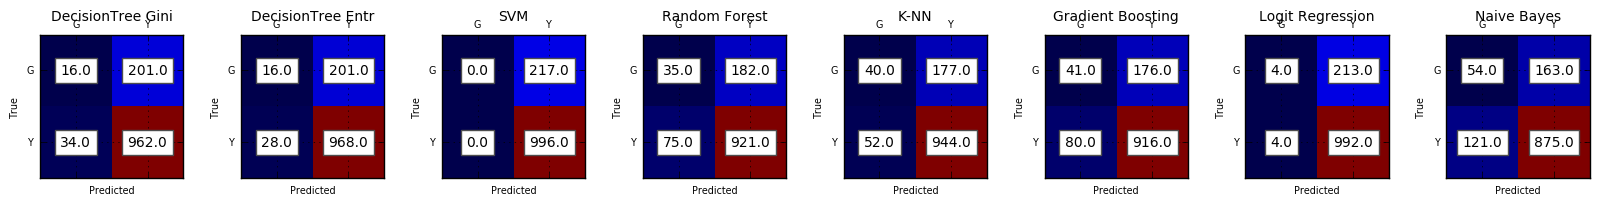

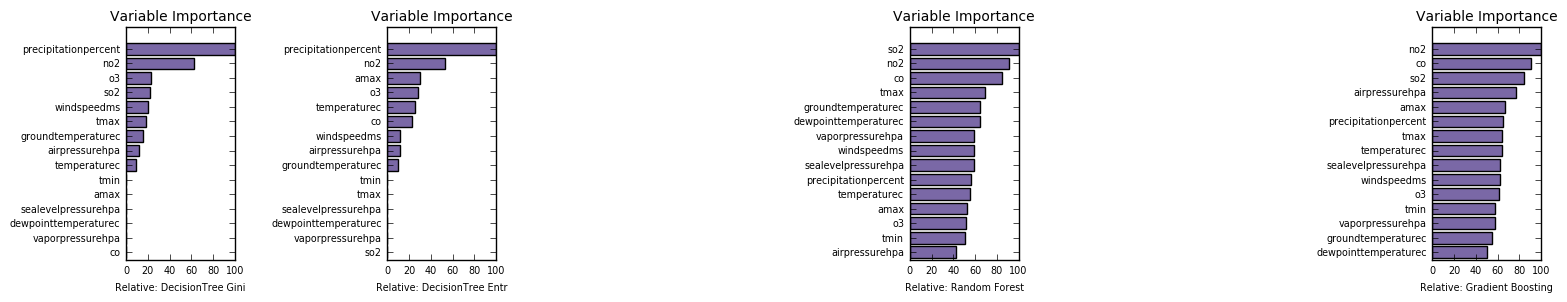

In [52]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "indexpef"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)


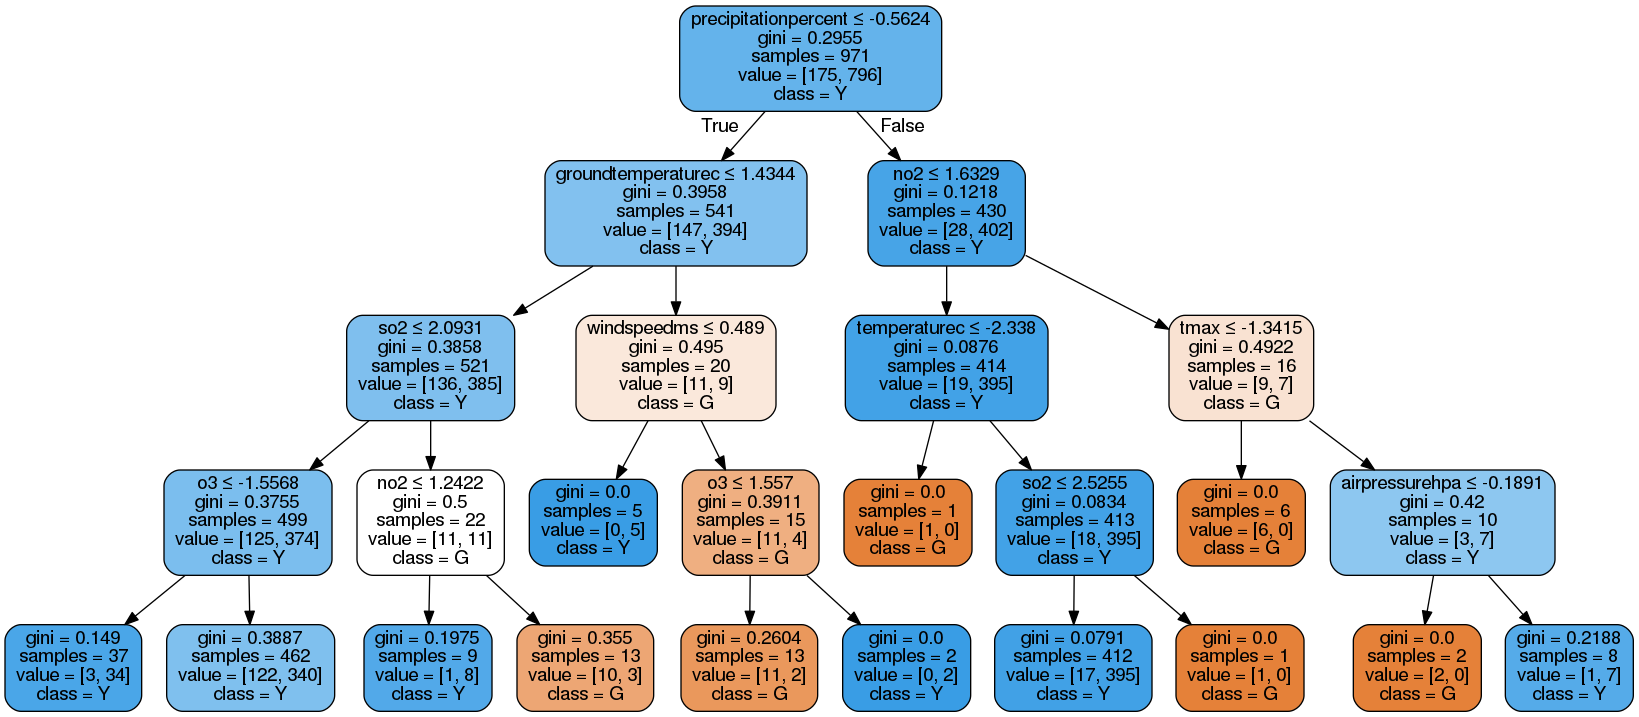

In [53]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])
